In [4]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw

LABELS = ['square', 'circle', 'cyan', 'red', 'yellow', 'green']

def gen_dataset(num_samples):
    
    colors = [(0, 192, 192),
         (255, 0, 0),
         (255, 255, 0), 
         (0, 255, 0)
         ]
    num_shapes = 2
    num_colors = len(colors)
    
    dataset = []
    labels = []
    for i in range(num_samples):

        # randomly draw a color
        color_id = np.random.randint(0, num_colors)
        # randomly select a shape (either square or circle)
        shape_id = np.random.randint(0, num_shapes)
        # create object
        im1 = Image.new('RGB', (28, 28), (128, 128, 128))
        draw = ImageDraw.Draw(im1)
        if shape_id == 0:
            draw.rectangle((5, 5, 22, 22), fill=colors[color_id])
        elif shape_id == 1:
            draw.ellipse((5, 5, 22, 22), fill=colors[color_id])

        label1 = np.zeros(num_shapes + num_colors)
        label1[0:num_shapes][shape_id] = 1.
        label1[num_shapes:][color_id] = 1.

        # sample attributes for second object
        all_attr_same = True
        while all_attr_same:
            # randomly draw a color
            color_id2 = np.random.randint(0, num_colors)
            # randomly select a shape (either square or circle)
            shape_id2 = np.random.randint(0, num_shapes)
            if color_id2 != color_id or shape_id2 !=shape_id:
                all_attr_same = False
        # create object
        im2 = Image.new('RGB', (28, 28), (128, 128, 128))
        draw = ImageDraw.Draw(im2)
        if shape_id2 == 0:
            draw.rectangle((5, 5, 22, 22), fill=colors[color_id2])
        elif shape_id2 == 1:
            draw.ellipse((5, 5, 22, 22), fill=colors[color_id2])

        label2 = np.zeros(num_shapes + num_colors)
        label2[0:num_shapes][shape_id2] = 1.
        label2[num_shapes:][color_id2] = 1.

        # pair both images and labels of these
        labels.append([label1, label2])
        imgs_np = [np.array(im1), np.array(im2)]
        dataset.append(imgs_np)
    
    return np.array(dataset), np.array(labels)

In [16]:
num_train_samples = 1000
num_val_samples = 1000

train_data, train_labels = gen_dataset(num_train_samples)
val_data, val_labels = gen_dataset(num_val_samples)

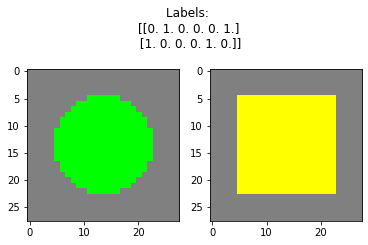

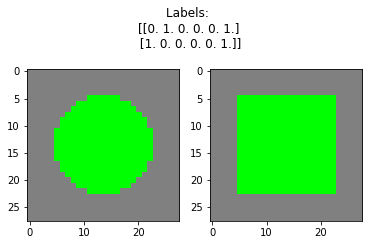

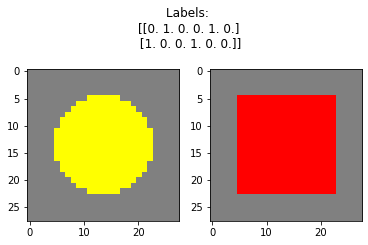

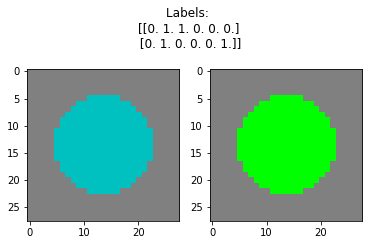

In [17]:
fig, axs = plt.subplots(1, 2)
axs[0].imshow(train_data[0, 0])
axs[1].imshow(train_data[0, 1])
plt.suptitle(f"Labels: \n{train_labels[0]}")
plt.show()

fig, axs = plt.subplots(1, 2)
axs[0].imshow(train_data[2, 0])
axs[1].imshow(train_data[2, 1])
plt.suptitle(f"Labels: \n{train_labels[2]}")
plt.show()

fig, axs = plt.subplots(1, 2)
axs[0].imshow(train_data[10, 0])
axs[1].imshow(train_data[10, 1])
plt.suptitle(f"Labels: \n{train_labels[10]}")
plt.show()

fig, axs = plt.subplots(1, 2)
axs[0].imshow(train_data[8, 0])
axs[1].imshow(train_data[8, 1])
plt.suptitle(f"Labels: \n{train_labels[8]}")
plt.show()

In [18]:
np.save("data/train_toydata_pairs.npy", train_data)
np.save("data/val_toydata_pairs.npy", val_data)
np.save("data/train_toydata_labels_pairs.npy", train_labels)
np.save("data/val_toydata_labels_pairs.npy", val_labels)

In [39]:
x = np.zeros(10)

In [40]:
x[6:][2] = 1

In [41]:
x

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.])